# Instalação
- conda install dask
- pip install dask

In [1]:
#pip install dask

Note: you may need to restart the kernel to use updated packages.


## 1. Dask Arrays

In [2]:
## Import dask Array
import dask.array as da

In [3]:
x = da.random.random((10000,10000), chunks=(1000,1000))

In [4]:
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [5]:
x.compute()

array([[0.01938835, 0.27756641, 0.35404   , ..., 0.95490531, 0.64436336,
        0.98400009],
       [0.22223296, 0.50519638, 0.00666613, ..., 0.25589321, 0.53268676,
        0.64635706],
       [0.11700922, 0.09706814, 0.01474314, ..., 0.82392812, 0.44159236,
        0.80537806],
       ...,
       [0.90372654, 0.13102167, 0.26540114, ..., 0.31192251, 0.42340461,
        0.06492362],
       [0.75749801, 0.22145908, 0.0712776 , ..., 0.4670162 , 0.58390716,
        0.52615933],
       [0.84212624, 0.29716624, 0.21298712, ..., 0.24686616, 0.73112922,
        0.57265927]])

# 2. Dask DataFrame

In [6]:
## import dataset default dask
from dask import datasets

In [7]:
df = datasets.timeseries()

In [8]:
df.persist()

,id,name,x,y
npartitions=30,,,,
2000-01-01,int64,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [9]:
df.compute()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1027,Quinn,0.060970,0.687058
2000-01-01 00:00:01,964,Charlie,-0.303998,0.167600
2000-01-01 00:00:02,1011,Ray,-0.777228,-0.742786
2000-01-01 00:00:03,999,Bob,-0.762434,-0.409903
2000-01-01 00:00:04,972,Wendy,0.836940,-0.664373
...,...,...,...,...
2000-01-30 23:59:55,1047,Ursula,-0.750153,-0.701363
2000-01-30 23:59:56,1041,Dan,0.604985,0.139442
2000-01-30 23:59:57,976,Frank,-0.382792,0.340790


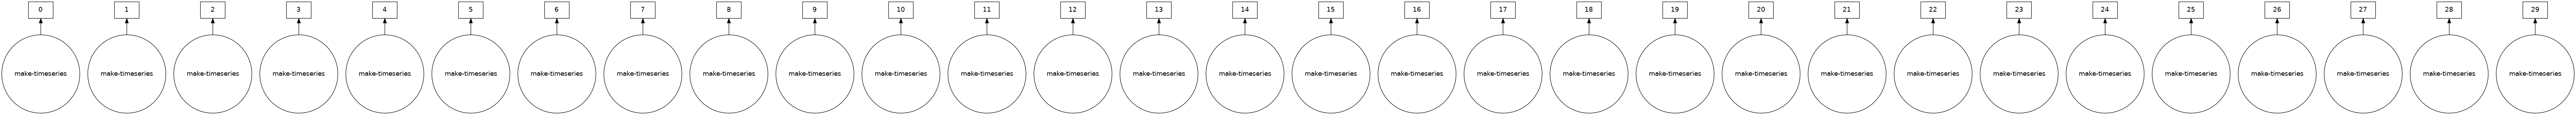

In [11]:
df.visualize()

# 3. Agendador Dinâmico

### Modo Distribuído 3.1

In [19]:
from dask.distributed import Client
client = Client() # Set Up local Cluster on your LaptTop
#Client = Client('127.0.0.1:8786')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 6.09 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46873,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 6.09 GiB
Comm: tcp://172.24.85.236:33529,Total threads: 1
Dashboard: http://172.24.85.236:40433/status,Memory: 1.52 GiB
Nanny: tcp://127.0.0.1:44985,


In [18]:
client.close()

## Análise Vôos no Brasil
### Data Set: 
https://www.kaggle.com/ramirobentes/flights-in-brazil

### 4.1 Leitura dos Dados

In [20]:
filename = 'home/biolabs/aws/___Publics_Repository/My-Data-Science-Journey/24-Notebooks/Dask/Anac-Voos-Brasil/BrFlights2.csv'